In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [3]:
pubg_data=pd.read_csv(r"E:\Projects\Machine Learning Projects\PUBG Cheater Detection\train_V2.csv")

In [4]:
pubg_data.shape

(4446966, 29)

In [5]:
pubg_data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [6]:
pubg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [7]:
pubg_data[pubg_data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [8]:
pubg_data.drop(2744604, inplace=True)

<AxesSubplot:>

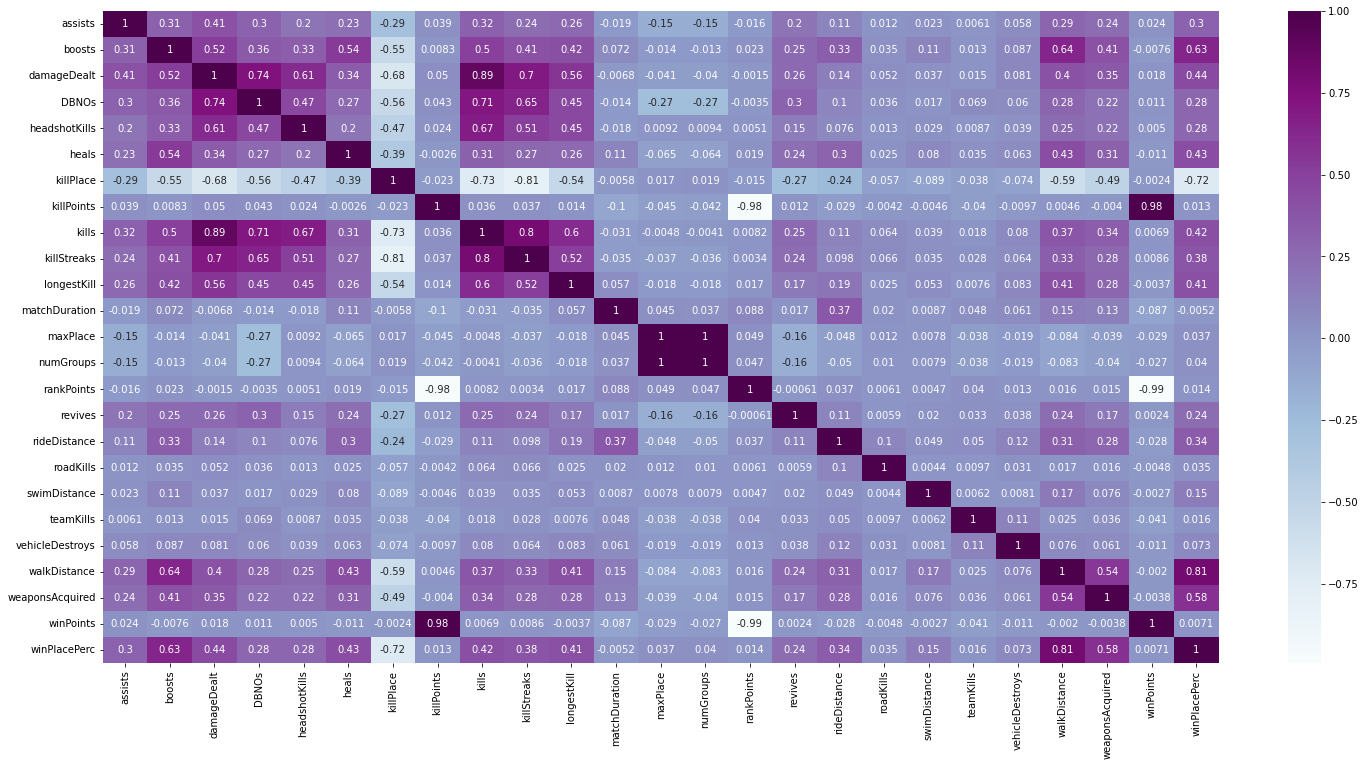

In [9]:
plt.figure(figsize=[25,12])
sns.heatmap(pubg_data.corr(), annot=True, cmap="BuPu")

In [11]:
pubg_data=pubg_data.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1)

In [12]:
pubg_data['totalDistance']=pubg_data['rideDistance'] + pubg_data['walkDistance'] + pubg_data['swimDistance']

In [13]:
pubg_data['potential cheaters']=((pubg_data['kills']>0) & (pubg_data['totalDistance']==0))

In [14]:
cheaters_data=pubg_data[pubg_data['potential cheaters']==True]

In [15]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index, inplace=True)

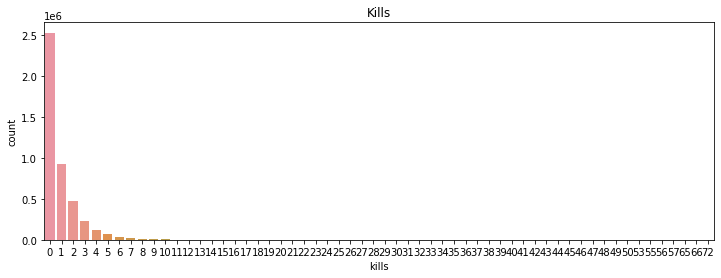

In [16]:
plt.figure(figsize=(12, 4))
sns.countplot(data=pubg_data, x=pubg_data['kills']).set_title('Kills')
plt.show()

In [17]:
pubg_data['potential cheaters']= ((pubg_data['kills']>59))
cheaters_data=pd.concat([cheaters_data, pubg_data[pubg_data['potential cheaters']==True]])

In [18]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index, inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


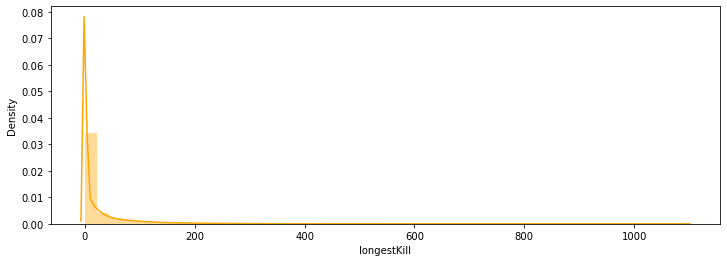

In [19]:
plt.figure(figsize=(12, 4))
sns.distplot(pubg_data['longestKill'], kde=True, color='orange')
plt.show()

In [20]:
pubg_data['potential cheaters']=((pubg_data['longestKill'] >= 1000))
cheaters_data=pd.concat([cheaters_data,pubg_data[pubg_data['potential cheaters']==True]])

In [21]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index,inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


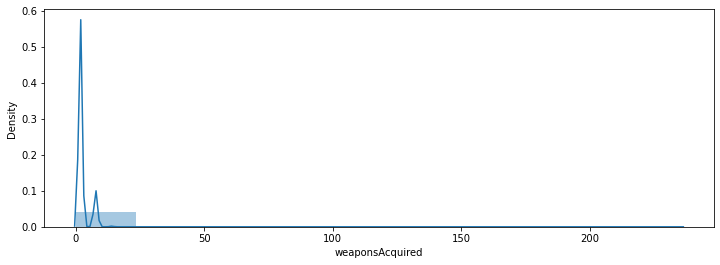

In [22]:
plt.figure(figsize=(12,4))
sns.distplot(pubg_data['weaponsAcquired'], bins=10)
plt.show()

In [23]:
pubg_data['potential cheaters']=((pubg_data['weaponsAcquired'] >= 50))
cheaters_data=pd.concat([cheaters_data,pubg_data[pubg_data['potential cheaters']==True]])

In [24]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index,inplace=True)

In [25]:
pubg_data['potential cheaters']=((pubg_data['weaponsAcquired'] == 0) & (pubg_data['kills']>10))
cheaters_data=pd.concat([cheaters_data,pubg_data[pubg_data['potential cheaters']==True]])

In [26]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index,inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


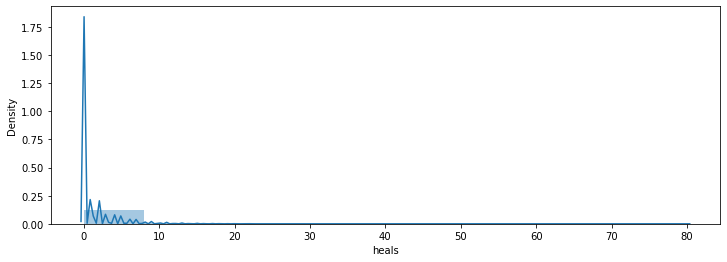

In [27]:
plt.figure(figsize=(12,4))
sns.distplot(pubg_data['heals'], bins=10)
plt.show()


In [28]:
pubg_data['potential cheaters']=((pubg_data['heals'] >=30))
cheaters_data=pd.concat([cheaters_data,pubg_data[pubg_data['potential cheaters']==True]])

In [29]:
pubg_data.drop(pubg_data[pubg_data['potential cheaters']==True].index,inplace=True)

In [30]:
pubg_data=pd.concat([pubg_data,cheaters_data])

In [31]:
pubg_data=pubg_data.drop('winPlacePerc',axis=1)

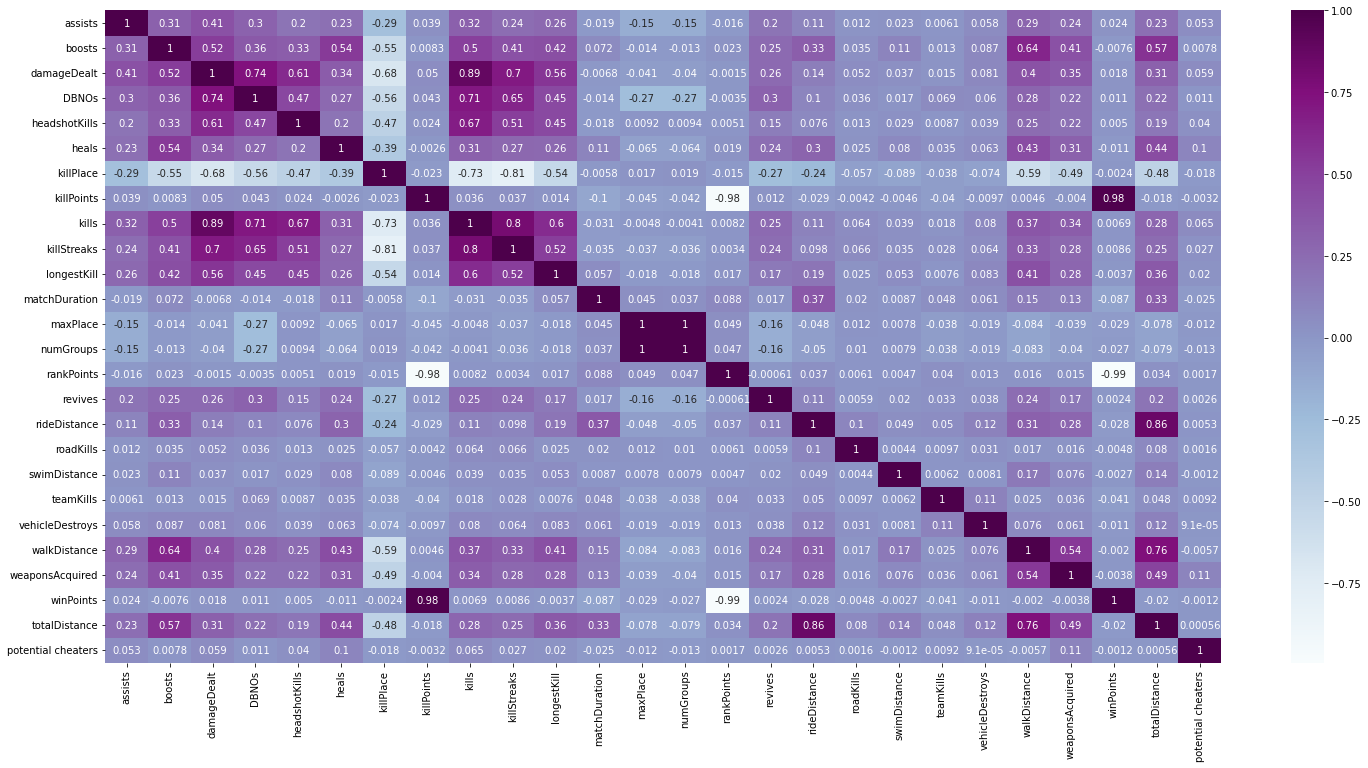

In [32]:
plt.figure(figsize=[25,12])
sns.heatmap(pubg_data.corr(),annot = True,cmap = "BuPu")
plt.show()

In [33]:
pubg_data.drop(['damageDealt','winPoints','rideDistance','swimDistance','walkDistance'],axis=1)
from sklearn.ensemble import RandomForestRegressor

In [34]:
target=pubg_data['potential cheaters']
features=pubg_data.drop('potential cheaters',axis=1)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.3,random_state=0)


In [36]:
model=RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features='sqrt')

In [37]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_predtrain=model.predict(x_train)

In [38]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_true=y_test,y_pred=y_pred,labels=model.classes_)


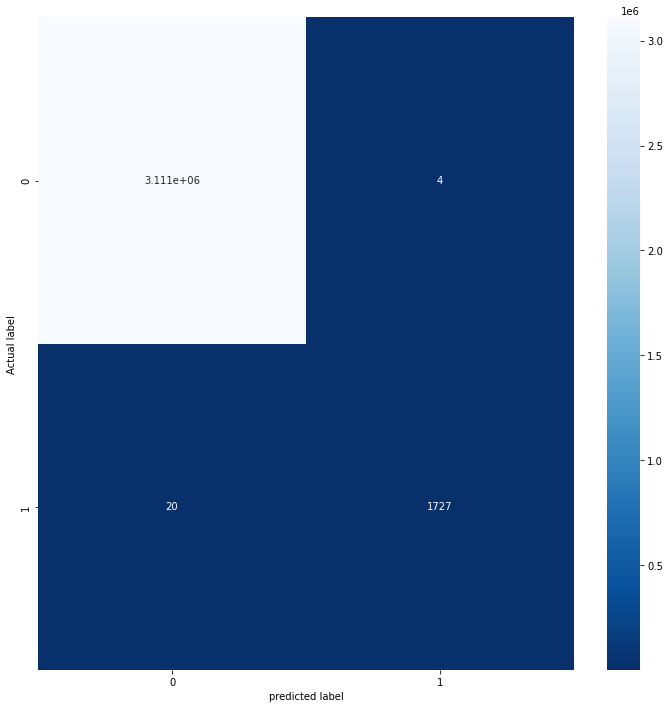

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,cmap='Blues_r',fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
plt.show()


In [40]:
print("test data accuracy: ", accuracy_score(y_test, y_pred))
print("test data precision score: ", precision_score(y_test, y_pred)) 
print("test data recall score: ", recall_score(y_test, y_pred))
print("test data f1 score: ", f1_score(y_test, y_pred))
print("test data area under curve (auc): ", roc_auc_score(y_test, y_pred))

test data accuracy:  0.9999922900880086
test data precision score:  0.997689196995956
test data recall score:  0.9885518030910132
test data f1 score:  0.9930994824611845
test data area under curve (auc):  0.9942752586920601
